In [153]:
# Load Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR


In [84]:
 #pip install yellowbrick.model_selection --user

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement yellowbrick.model_selection (from versions: none)
ERROR: No matching distribution found for yellowbrick.model_selection


In [121]:
# Load data
Train = pd.read_csv("train.csv")
Test = pd.read_csv("test.csv")

In [122]:
# Fix data
del Train['ID_code']
del Test['ID_code']

In [123]:
# Split Train into X,Y
X = Train.loc[:,Train.columns != 'target']
Y = Train['target']

In [124]:
# Make train test split out of train dataset 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state=42)

In [125]:
# Replace Nan's and inf's
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [126]:
# USING SMOTE TO DEAL WITH THE IMBALANCE
sm = SMOTE(random_state = 2)
X_train_Smote, Y_train_Smote = sm.fit_resample(X_train, y_train.ravel())

In [95]:
# SGD Classifer 
sgd = SGDClassifier(loss='modified_huber',shuffle=True,random_state=101, learning_rate= 'optimal')
sgd.fit(X_train_Smote,Y_train_Smote)

In [163]:
# Confusion Matrix
SGD_pred = sgd.predict(X_test)
Confusion_SGD = confusion_matrix(y_test,y_pred)
print(Confusion_SGD)

[[36299  1145]
 [ 3598   608]]


In [155]:
# Cross Validation
cross_val_score(sgd, X_train_Smote_short, Y_train_Smote_short, cv=3, scoring="accuracy")

array([0.88572286, 0.90849085, 0.90249025])

In [21]:
# Sample for the Random Forest
X_train_Smote_short = X_train_Smote.head(10000)
Y_train_Smote_short = Y_train_Smote[:10000]

In [ ]:
model = RandomForestRegressor()
model.fit(X_train_Smote_short, Y_train_Smote_short)

In [ ]:
# Predicting / Confusion Matrix
rf_pred = (model.predict(X_test)[:,] >= 0.21).astype(bool)
Confusion_RF = confusion_matrix(y_test,rf_pred)
print(Confusion_RF)

In [160]:
# Cross Validation 
cross_val_score(model, X_train_Smote_short, Y_train_Smote_short, cv=3, scoring="accuracy")

C:\Users\nofoi\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nofoi\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\nofoi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\nofoi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\nofoi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, 

array([nan, nan, nan])

Feature: 0, Score: 0.00627
Feature: 1, Score: 0.00572
Feature: 2, Score: 0.00609
Feature: 3, Score: 0.00587
Feature: 4, Score: 0.00339
Feature: 5, Score: 0.00429
Feature: 6, Score: 0.01085
Feature: 7, Score: 0.00528
Feature: 8, Score: 0.00412
Feature: 9, Score: 0.00496
Feature: 10, Score: 0.00373
Feature: 11, Score: 0.00410
Feature: 12, Score: 0.01863
Feature: 13, Score: 0.00778
Feature: 14, Score: 0.00332
Feature: 15, Score: 0.00386
Feature: 16, Score: 0.00268
Feature: 17, Score: 0.00436
Feature: 18, Score: 0.00637
Feature: 19, Score: 0.00360
Feature: 20, Score: 0.00356
Feature: 21, Score: 0.00559
Feature: 22, Score: 0.00751
Feature: 23, Score: 0.00426
Feature: 24, Score: 0.00476
Feature: 25, Score: 0.00343
Feature: 26, Score: 0.01087
Feature: 27, Score: 0.00258
Feature: 28, Score: 0.00490
Feature: 29, Score: 0.00252
Feature: 30, Score: 0.00482
Feature: 31, Score: 0.00484
Feature: 32, Score: 0.00629
Feature: 33, Score: 0.00358
Feature: 34, Score: 0.00706
Feature: 35, Score: 0.00682
Fe

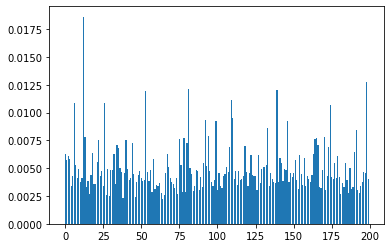

In [149]:
2# get importance
importance = model.feature_importances_
Import = pd.DataFrame()
t = 0 
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    #if v > .0055: 
        
        
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [150]:
# Most important importance
importance2 = [i for i in importance if i >=.0055]
importance2
#importance

[0.006271148246142824,
 0.005718554520516375,
 0.006091856432258389,
 0.005870891558139877,
 0.010853183610105293,
 0.018628978633697942,
 0.007782714209690188,
 0.006371319114279175,
 0.005592022132342104,
 0.007511381374982585,
 0.010871280103303783,
 0.006291304651574776,
 0.007056149245128297,
 0.006820464901146833,
 0.00754520427270943,
 0.00724400345471267,
 0.0119104057063744,
 0.005793446069971758,
 0.006287155145890871,
 0.007670710432902656,
 0.0077331113793227295,
 0.007267607629547452,
 0.012145060813964072,
 0.009372731044793518,
 0.007860975008946662,
 0.009240574038361522,
 0.006940863940220417,
 0.011121027847850802,
 0.009509174356567538,
 0.0069759392120749475,
 0.006190199043304975,
 0.006205443698081733,
 0.008634063274182714,
 0.012054505510026126,
 0.005911029834513093,
 0.00927515582481147,
 0.0057330835189988594,
 0.006147835761402202,
 0.005882301614569444,
 0.006277019905194825,
 0.007614576459112684,
 0.007718392544318564,
 0.0070997677956594505,
 0.007780219

In [99]:
,
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X_train_Smote_short, Y_train_Smote_short)

SVR(C=100, degree=2, kernel='poly')

In [110]:
# Confusion Matrix
y_pred = (svm_poly_reg.predict(X_test)[:,] >= 0.5).astype(bool)
Confusion_SVM = confusion_matrix(y_test,y_pred)
print(Confusion_SVM)

[[33637  3807]
 [ 2974  1232]]


array([False, False, False, ..., False, False, False])

In [113]:
y_pred = (svm_poly_reg.predict(X_test)[:,] >= 0.7).astype(bool)
Confusion_SVM = confusion_matrix(y_test,y_pred)
print(Confusion_SVM)

[[36299  1145]
 [ 3598   608]]


In [151]:
import scikitplot as skplt
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'scikitplot'

In [161]:
metrics.plot_roc_curve(svm_poly_reg, X_test, y_test)

C:\Users\nofoi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: Expected 'estimator' to be a binary classifier, but got SVR

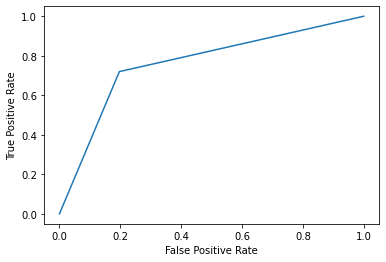

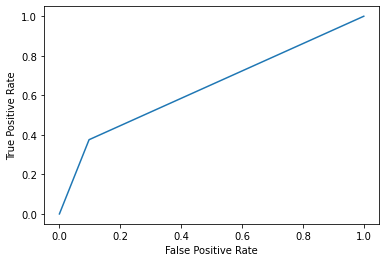

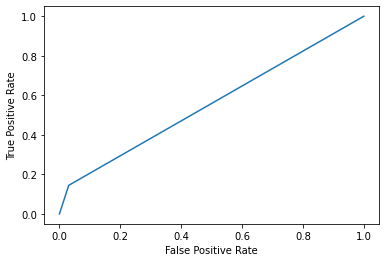

In [166]:

fpr, tpr, _ = metrics.roc_curve(y_test, SGD_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test, rf_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()